
# Project: Investigate a Dataset - TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#assess">Data Assessment</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This data set contains information about 10,000+ movies(released between 1961 - 2015) from The Movie Database (TMDb). It consists of 21 Columns with information about the genre, director, budget , revenue, release date , production company, user rating etc.
The Movie Database (TMDB) is a community built movie and TV database. Every piece of data are added by the community members.


### Question(s) for Analysis
>* Which year has the highest release of movie?
>* Which month is most movies released over the years?
>* What is the genre of most movies?
>* Movie genre trend from year to year
>* Is there a correlation between rating, popularity and runtime?
>* What kind of characteristics are associated with high revenue movies (e.g Runtime, Production company, release month, genres, director, actors, budget)

In [107]:
# Importing Libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

%matplotlib inline


<a id='assess'></a>
## Data Assessment

In [41]:
# Load Dataset

df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [42]:
# Checking the quantity of data

print('Dataset contains {} rows and {} columns.'.format(df_movies.shape[0],df_movies.shape[1]))

Dataset contains 10866 rows and 21 columns.


In [43]:
# Checking data quality which includes datatype and missing rows. 

df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>There are 9 columns with missing data and one column(release_date) with an incorrect datatype. This would be cleaned up in the data cleaning session.

In [44]:
# Checking for duplicated data

print('Dataset contains {} row(s) of duplicated data'.format(sum(df_movies.duplicated())))

Dataset contains 1 row(s) of duplicated data


In [45]:
# Checking unique values in each columns

df_movies.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [46]:
# Summary statistics of the data

df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>The minimum values and about 50% of the budget, revenue and runtime columns being zero is a lot of concern. We know there is no way a movie will have a zero budget, revenue and runtime. That means nothing was made.

In [47]:
# Investigating budget column
zero_budgets = df_movies[df_movies['budget'] ==0 ]
zero_budgets['budget'].count()

5696

In [48]:
# Investigating revenue column
zero_revenue = df_movies[df_movies['revenue'] ==0 ]
zero_revenue['revenue'].count()

6016

In [49]:
# Investigating runtime column
zero_runtime = df_movies[df_movies['runtime'] ==0 ]
zero_runtime['runtime'].count()

31

>From the above, we can see that about 60% of rows have budget with zero values and also have revenue with zero values. Also we have some rows with runtime as zero.

<a id='clean'></a>
## Data Cleaning
> This includes transforming the dataset into something usable for our analysis. It involves cleaning up unneccesary columns for the analysis, missing rows, duplicated data and incorrect datatypes.

In [50]:
# Dropping columns not necessary for the analysis

df_movies.drop(columns = ['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget', 'revenue', 'budget_adj', 'revenue_adj'], inplace = True)
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   original_title        10866 non-null  object 
 3   cast                  10790 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   release_date          10866 non-null  object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_year          10866 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1018.8+ KB


>I removed the budget and revenue columns because even though they are neccessary for our analysis and dropping rows with zero values may seem like the logical thing to do, the conclusion the analysis would give if we do this will be inaccurate because we would be judging based on <40% of the data.

>I also checked the zero problems with the database site itself and confirmed that these results weren't on the site. My conclusion would be that since the data are gathered by various individuals and not the real movie producers, there may be a difficulty in accessing some figures which led to no informations regarding those movies.

>Also, i noticed that the runtime column also had some zero values, while this is similar to the budget and revenue case, the rows with this issue are few and we know there is an easy access as to know the runtime of a movie. The conclusion of this would be wrong input so i would drop them.

In [51]:
# Dropping runtime rows with zero values

array = np.array(zero_runtime['runtime'].index)
df_movies.drop(index=array, inplace = True)

# Checking if the rows were removed
sum(df_movies['runtime'] ==0 )

0

In [52]:
# Drop duplicated

df_movies.drop_duplicates(inplace= True)
print('Dataset contains {} row(s) of duplicated data'.format(sum(df_movies.duplicated())))

Dataset contains 0 row(s) of duplicated data


In [53]:
# Dealing with Nulls - Checking number of nulls in each column

df_movies.isna().sum()  

id                         0
popularity                 0
original_title             0
cast                      76
director                  42
runtime                    0
genres                    22
production_companies    1012
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [54]:
# Dealing with Nulls - dropping nulls

df_movies.dropna(inplace= True)

In [55]:
# Dealing with Nulls - Checking that the nulls were removed

df_movies.isna().sum()

id                      0
popularity              0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [56]:
# Change Release_date to datetime

df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

In [57]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9759 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9759 non-null   int64         
 1   popularity            9759 non-null   float64       
 2   original_title        9759 non-null   object        
 3   cast                  9759 non-null   object        
 4   director              9759 non-null   object        
 5   runtime               9759 non-null   int64         
 6   genres                9759 non-null   object        
 7   production_companies  9759 non-null   object        
 8   release_date          9759 non-null   datetime64[ns]
 9   vote_count            9759 non-null   int64         
 10  vote_average          9759 non-null   float64       
 11  release_year          9759 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 991.1+ 

In [58]:
# Summary statistics of data
df_movies.describe()

,id,popularity,runtime,vote_count,vote_average,release_year
count,9759.000000,9759.000000,9759.000000,9759.000000,9759.000000,9759.000000
mean,62952.180859,0.695266,103.063736,239.597602,5.964535,2000.862793
std,90448.988464,1.037370,27.641529,603.361812,0.912967,13.038056
min,5.000000,0.000188,3.000000,10.000000,1.500000,1960.000000
25%,10217.500000,0.232931,91.000000,18.000000,5.400000,1994.000000
50%,18632.000000,0.420185,100.000000,46.000000,6.000000,2005.000000
75%,70146.500000,0.777162,112.000000,173.500000,6.600000,2011.000000
max,417859.000000,32.985763,877.000000,9767.000000,8.700000,2015.000000


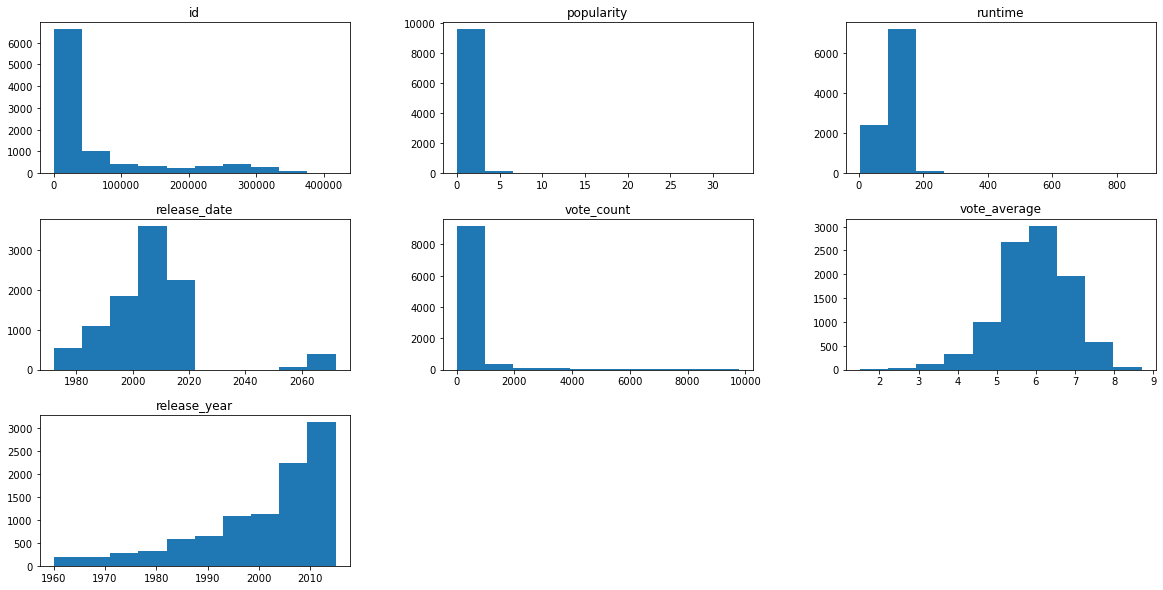

In [59]:
# Showing value distribution of quantitative columns
df_movies.hist(figsize=(20,10), grid = False);

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Which year has the highest release of movie?)

In [60]:
# Showing top count of movies by year

movie_count = df_movies.groupby('release_year').count().id
df_movies.groupby('release_year').count().id.sort_values(ascending =False).head()

release_year
2014    633
2013    564
2015    554
2012    497
2009    474
Name: id, dtype: int64

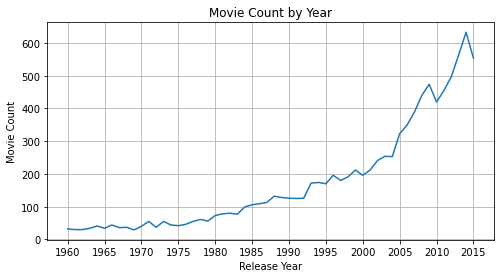

In [61]:
movie_count.plot(xticks=np.arange(1960, 2016, 5), figsize = (8,4), grid = True)
plt.title('Movie Count by Year')
plt.ylabel('Movie Count')
plt.xlabel('Release Year');

The chart above shows there is an increase in movies released each year with 2014 being the year with the most released movie.

### Research Question 2  (Which month is most movies released over the years?)

In [62]:
# Extracting month from the release date

df_movies['month'] = df_movies['release_date'].dt.month_name().str[:3]
df_movies['month'].value_counts()

Sep    1203
Oct    1032
Dec     894
Aug     842
Jun     765
Jan     747
May     740
Mar     738
Nov     735
Apr     722
Jul     713
Feb     628
Name: month, dtype: int64

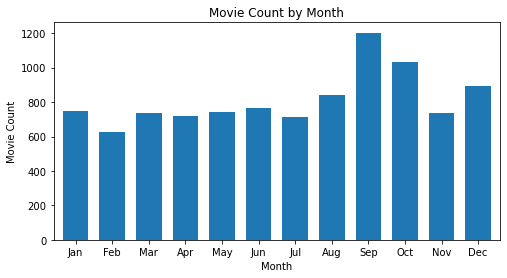

In [63]:
order = "Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec".split() 
month_count = df_movies.groupby(['month']).count().loc[order].id

month_count.plot(kind ='bar', figsize = (8,4), rot = 0, width = 0.7)
plt.title('Movie Count by Month')
plt.ylabel('Movie Count')
plt.xlabel('Month');

Most movies are released in September and October.

### Research Question 3  (What is the genre of most movies?)

The genre, cast, director and production_companies column have multiple data in each row separated by a pipe symbol(|). I created a function below to separate them

In [64]:
# Function to separate values in column

def split_columns(col):
    data = pd.Series(df_movies[col].str.cat(sep='|').split('|'))
    return data

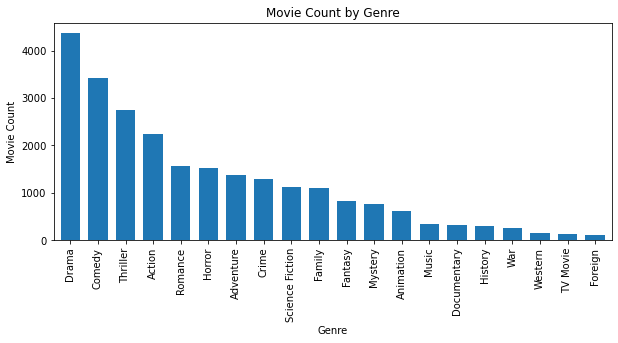

In [65]:
genre_count = split_columns('genres').value_counts()

genre_count.plot(kind ='bar', figsize = (10,4), rot = 90, width = 0.7)
plt.title('Movie Count by Genre')
plt.ylabel('Movie Count')
plt.xlabel('Genre');

Majority of the movies produced fall into the genre of drama. We also have the Comedy, thriller and action genres topping the charts.

### Research Question 4  (Movie Genre trend from year to year)

In [123]:
# Creating a new dataframe with columns necessary to answer this question (i want the old dataframe intact)

df = df_movies[['genres', 'release_year', 'id']]

genre_split = df['genres'].str.split('|')
df.loc[:, 'genres'] = genre_split
df = df.explode('genres', ignore_index=True)

In [86]:
trend = df.groupby(['release_year', 'genres'])['id'].count().unstack()

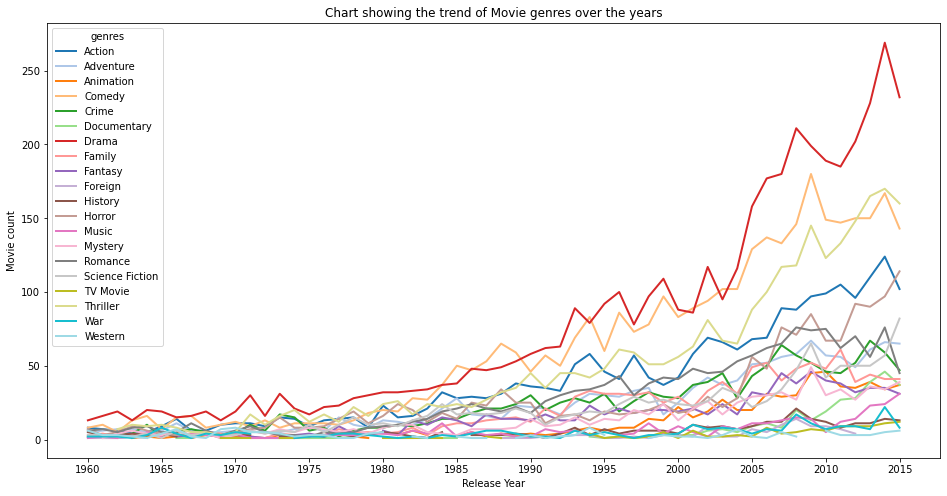

In [121]:
ax = trend.plot(figsize = (16, 8), linewidth = 2.0, colormap = cm.get_cmap('tab20'))
ax.set(xticks=np.arange(1960, 2016, 5),xlabel='Release Year', ylabel='Movie count', 
       title = 'Chart showing the trend of Movie genres over the years');

Generally, the number of movies released in all movie genres increased in recent years (confirms the first chart). We can also see a rapid increase in Drama followed by comedy and thriller which also confirms why drama was the genre of most released movies. 

### Research Question 5  (Is there a correlation between rating, popularity and runtime?)

In [69]:
# Checking first for correlation between variables

df_movies.corrwith(df_movies['vote_average'])

id             -0.087215
popularity      0.238903
runtime         0.191821
vote_count      0.279720
vote_average    1.000000
release_year   -0.139250
dtype: float64

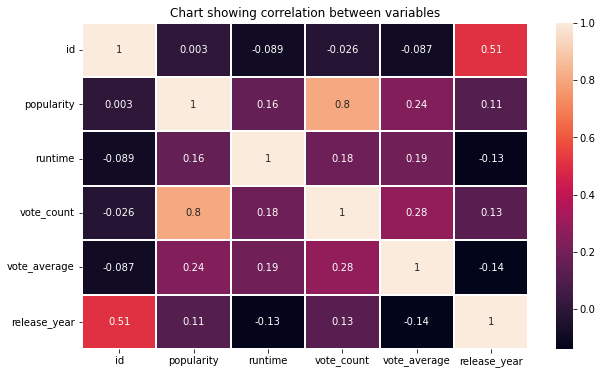

In [70]:
plt.figure(figsize = (10, 6))
sns.heatmap(df_movies.corr(),linewidths=0.2, annot = True)
plt.title('Chart showing correlation between variables');

Here, we see that popularity has a fair positive correlation with rating, that means the more popular a movie is, the tendenecy of it receiving a higher rating. However, this data is not sufficient to prove such claims.

### Limitations

> Analysis could not be done on revenue and budget. This is because about 60% of the data were zero values and removing these rows will further affect the quality of the dataset and any analysis performed will lead to inaccurate results.


<a id='conclusions'></a>
## Conclusions
 > The data shows the following:
 >* There is an increase in movies released over the years and that that can be drawn to investment in the movie industry.
 >* Most movies are released in september and october.
 >* Majority of movies are drama.
 >* A movie might receive a good rating due to it's popularity.